In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [54]:
from tensorflow.keras import datasets, layers, models

In [44]:
path = "data/"
print(os.listdir("data/"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


## load data

In [34]:
train_data = pd.read_csv(path + "train.csv", parse_dates = ['datetime'],
                         index_col='datetime', infer_datetime_format=True)
test_data = pd.read_csv(path + 'test.csv', parse_dates = ['datetime'],
                        index_col='datetime', infer_datetime_format=True)
samp_subm = pd.read_csv(path+'sampleSubmission.csv', parse_dates = ['datetime'],
                        index_col='datetime', infer_datetime_format=True)

In [41]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
test_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [43]:
samp_subm.head()

,count
datetime,
2011-01-20 00:00:00,0
2011-01-20 01:00:00,0
2011-01-20 02:00:00,0
2011-01-20 03:00:00,0
2011-01-20 04:00:00,0


C:\Users\USER\anaconda3\envs\tf01\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

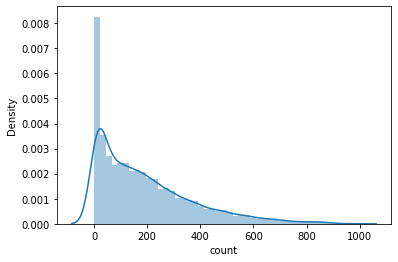

In [51]:
sns.distplot(train_data["count"])

In [63]:
x_train = np.array(train_data.iloc[:,:10])

In [68]:
x_train = x_train.re

(10886, 10)

In [65]:
train_data.iloc[:,10]

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: count, Length: 10886, dtype: int64

In [66]:
y_train = np.array(train_data.iloc[:,10])

In [ ]:
model = models.Sequential()
model.add(layers.SimpleRNN(8, input_shape = (10,1)))
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs =400, verbose=0)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_predict))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_predict.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()